In [1]:
#Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.reshape(-1, 28, 28, 1) / 255.0, test_images.reshape(-1, 28, 28, 1) / 255.0

#One-hot encoding
train_labels_one_hot = tf.one_hot(train_labels, depth=10)
test_labels_one_hot = tf.one_hot(test_labels, depth=10)

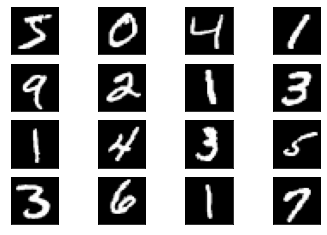

In [4]:
#Visualize first 16 data points
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(train_images[i].reshape(28, 28), cmap='Greys_r')

In [5]:
#Building the NN model
model = models.Sequential()
model.add(layers.Conv2D(25, 12, strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, 5, strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 25)          3625      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          40064     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
#Split into training and validation sets (80/20 split)
N = len(train_images)
N_train = int(0.8 * N)
train_images_sub = train_images[:N_train]
train_labels_sub = train_labels_one_hot[:N_train]
val_images = train_images[N_train:]
val_labels = train_labels_one_hot[N_train:]

In [7]:
#Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Optimizer
    # Loss function to minimize
    loss=losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=['accuracy'],
)

In [8]:
#Train the model
history = model.fit(
    train_images_sub,
    train_labels_sub,
    batch_size=50,
    epochs=20,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(val_images, val_labels),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 23s 480us/sample - loss: 0.4306 - accuracy: 0.8814 - val_loss: 0.1543 - val_accuracy: 0.9549
Epoch 2/20
48000/48000 [==============================] - 23s 483us/sample - loss: 0.1292 - accuracy: 0.9617 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 3/20
48000/48000 [==============================] - 23s 483us/sample - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 4/20
48000/48000 [==============================] - 24s 507us/sample - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 5/20
48000/48000 [==============================] - 24s 502us/sample - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 6/20
48000/48000 [==============================] - 25s 515us/sample - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 7/20
48000/48000 [====================

In [9]:
# Evaluate the model on the test data
results = model.evaluate(test_images, test_labels_one_hot)

10000/10000 [==============================] - 1s 146us/sample - loss: 0.0339 - accuracy: 0.9912
